# Задание 1 (2 балла)

Семинарские материалы, нужные для выполнения заданий, вы найдете в канале курса в архивах ngrams.zip и bow_classification.zip

Преобразуйте таблицу с абсолютными частотностями в семинарской тетрадке в таблицу с tfidf значениями. (Таблица - https://i.ibb.co/r5Nc2HC/abs-bow.jpg) Формула tfidf есть в семинаре на картнике с пояснениями на английском. 
Можно считать в Google Sheets, Excel, Питоне или на листочке. Сделайте скрин получившейся таблицы и загрузите картинку на гитхаб, вставьте ссылку в поле ниже.

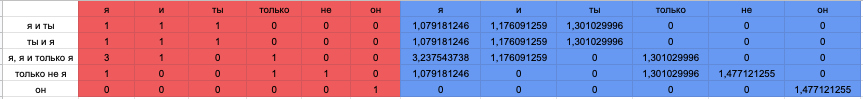

In [1]:
from IPython.display import Image
from IPython.core.display import HTML

Image(data="tfidf.png", width=900, height=400)

# Задание 2 (3 балла)
а) Посчитайте близость между 3 и 12666 текстами в датасете (labeled.csv из семинара)  
б) найдите 3 самых близких текста к тексту номер 43; выведите сами тексты и значения близостей, а не только индексы этих текстов.  
Векторизовать можно любым способом, но постарайтесь, чтобы 1 и 0 не получались в близостях.  
Результат запишите в тетрадке.  

In [2]:
import pandas as pd
pd.set_option('max_colwidth', 1000)
data = pd.read_csv("./labeled.csv")
data.head()

,comment,toxic
0,"Верблюдов-то за что? Дебилы, бл...\n",1.0
1,"Хохлы, это отдушина затюканого россиянина, мол, вон, а у хохлов еще хуже. Если бы хохлов не было, кисель их бы придумал.\n",1.0
2,Собаке - собачья смерть\n,1.0
3,"Страницу обнови, дебил. Это тоже не оскорбление, а доказанный факт - не-дебил про себя во множественном числе писать не будет. Или мы в тебя верим - это ты и твои воображаемые друзья?\n",1.0
4,"тебя не убедил 6-страничный пдф в том, что Скрипалей отравила Россия? Анализировать и думать пытаешься? Ватник что ли?)\n",1.0


In [3]:
data.toxic.value_counts()

0.0    9586
1.0    4826
Name: toxic, dtype: int64

In [4]:
data.comment = data.comment.str.replace("\n"," ")
X, y = data['comment'].tolist(), data['toxic'].values

# Посчитайте близость между 3 и 12666 текстами в датасете (labeled.csv из семинара)

In [5]:
print(data.comment[3])
print('_____________')
print(data.comment[12666])

Страницу обнови, дебил. Это тоже не оскорбление, а доказанный факт - не-дебил про себя во множественном числе писать не будет. Или мы в тебя верим - это ты и твои воображаемые друзья? 
_____________
Это не параноик, это дебил 


In [6]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=6, max_df=0.5, max_features=1500)
X = vectorizer.fit_transform(data.comment)

In [7]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(X[3], X[12666])

array([[0.61278416]])

# Найдите 3 самых близких текста к тексту номер 43; выведите сами тексты и значения близостей, а не только индексы этих текстов.¶


In [8]:
tfidf_matrix = TfidfVectorizer().fit_transform(data.comment)
similarities = tfidf_matrix[43].dot(tfidf_matrix.transpose())
similarities = similarities.toarray()[0]
most_similar = similarities.argsort()[-4:-1]
print(data.comment[43])

Люди зажрались и охуели если по мнению этих игроков андромеда лучше Антема. Хотя че там с багаутом76 сравнивают вон... Вот оно че оказывается, игроки просто охуели, ну ок. Вот долбанные пидерасы, не хотят покупать такую отличную игру, а еще смеют ругать такой божественный геймплей. Баги, хуевый геймплей поправят, а контент, ну его запилят, через год другой, причем бесплатно! Ага. Стоит лишь потерпеть! 


In [9]:
for text_id in most_similar[::-1]:
    print(data.comment[text_id], similarities[text_id])

НУ И КАКАЯ МРАЗЬ КИДАЕТ ССЫЛКИ? ОХУЕЛИ ТАМ В КРАЙ УЖЕ?  0.16043982092396117
Че за бригада и че за махоун? Из полицейской академии? 0.11789148760536663
Герка ебет только даунов которые игрли а него. Ибо и геймплей и сюжетто кусок говна.  0.11409080923099105


# Задание 3 (5 баллов)
Обучите 2 любых разных классификатора из семинара. Предскажите токсичность для текстов из 2ch_corpus.txt (второй семинар) и найдите 10 самых токсичных для каждого из классификаторов. Сравните получаемые тексты - какие тексты совпадают, какие отличаются, правда ли тексты токсичные?
*Можете предсказывать не все данные, но не менее 2500.

Требования к классификаторам:  
а) один должен использовать CountVectorizer, другой TfidfVectorizer  
б) у векторазера должны быть вручную заданы как минимум 5 параметров  
в) у классификатора должно быть задано вручную как минимум 2 параметра  
г) f1 мера каждого из классификаторов должна быть минимум 0.75  

# Linear regression + TfidfVectorizer

In [10]:
from sklearn.model_selection import train_test_split

X, y = data.comment.tolist(), data.toxic.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

In [11]:
from sklearn.linear_model import LogisticRegression
import sklearn.feature_extraction.text as skf
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix


logreg = Pipeline([
    (
        'vec',
        skf.TfidfVectorizer(
            stop_words = None,
            ngram_range = (1, 1),
            min_df = 1,
            max_df = 1.0,
            max_features = 75000,
            lowercase = True
        )
    ),
    (
        'clf',
        LogisticRegression(
            C = 100.0,
            penalty = 'l2',
            fit_intercept = True
        )
    )
])

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[3621  233]
 [ 571 1340]]
              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90      3854
         1.0       0.85      0.70      0.77      1911

    accuracy                           0.86      5765
   macro avg       0.86      0.82      0.83      5765
weighted avg       0.86      0.86      0.86      5765



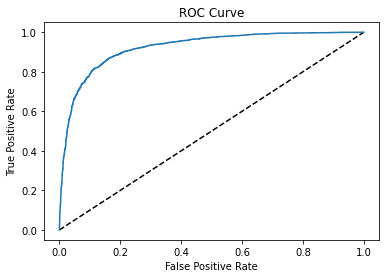

In [12]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

y_pred_prob = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


# Naive Bayes + CountVectorizer

In [13]:
from sklearn.naive_bayes import MultinomialNB

nb = Pipeline([
    (
        "vec",
        skf.CountVectorizer(
            lowercase=True,
            max_df=0.9, 
            max_features=10000,
            min_df=2,
            ngram_range=(1,1),
            stop_words=None
        )
    ),
    (
        "clf",
        MultinomialNB(alpha=0.9, fit_prior=False)
    )
])

nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3438  416]
 [ 367 1544]]
              precision    recall  f1-score   support

         0.0       0.90      0.89      0.90      3854
         1.0       0.79      0.81      0.80      1911

    accuracy                           0.86      5765
   macro avg       0.85      0.85      0.85      5765
weighted avg       0.87      0.86      0.86      5765



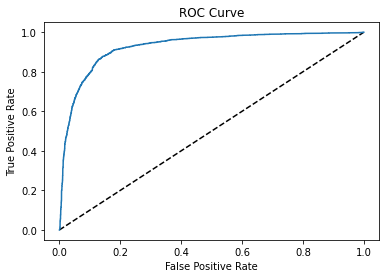

In [14]:
y_pred_prob = nb.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


# Сравните получаемые тексты - какие тексты совпадают, какие отличаются, правда ли тексты токсичные? 

In [15]:
!pip install eli5
import eli5

eli5.show_weights(logreg, top=20, feature_names=logreg.get_params()['vec'].get_feature_names())

Weight?,Feature
+17.763,ты
+16.682,хохлы
+15.631,хохлов
+13.340,быдло
+12.384,нахуй
+11.870,русских
+10.898,блять
+10.268,тупые
+10.133,тебя
+9.861,тупой


In [16]:
with open('2ch_corpus.txt', encoding='utf-8') as f:
    text = f.readlines()[0:2500]

In [17]:
def classifier(model, text):

    preds = model.predict(text)
    pred_probs = model.predict_proba(text)

    top10 = pred_probs[:,1].argsort()[::-1][:10]
    top10_probs = pred_probs[top10, 1]
    
    return top10, top10_probs

In [18]:
# Первый классификатор
top10_logreg_tfidf, probs = classifier(logreg, text)

# Второй классификатор
top10_nb_count, _probs = classifier(nb, text)

In [19]:
intersection = set(top10_logreg_tfidf) & set(top10_nb_count)
print(intersection)

{704, 2260}


In [20]:
text[704]

' Набежали хохлы дауны которы не смогли решить задачу, обиделись, и во всем виноват совок) хохлы - такие хохлы\n'

In [21]:
text[2260]

' Не ты ли в мотаче про трек-сессии рассказывал?Ну и потом, как бы то ни было, нахуй тебе всралась жена, которой на тебя похуй. Ей на тебя похуй, понимаешь?\n'

In [22]:
for _id, prob in zip(top10_logreg_tfidf, probs):
    print(prob)
    print(text[_id])
    print('_______________________')

0.9999999753757299
 >ElixirНу ты и говноед.

_______________________
0.9999994608778922
 И нахуй ты это ему написал?

_______________________
0.9999986187433206
 Ебать ты юморист донный.

_______________________
0.9999978770570438
 и лучше хохлов сосунов типо тебя

_______________________
0.9999973731087736
 Набежали хохлы дауны которы не смогли решить задачу, обиделись, и во всем виноват совок) хохлы - такие хохлы

_______________________
0.9999972868938138
 оуоуоуо уча уча уча аиавивива ну ты ну ты ну ты ВИЧУУУУУУУУУУУУУУУУУХА

_______________________
0.9999961918367435
 Да ты я смотрю дурачок.

_______________________
0.9999954223422951
 Кто подданный? Ты подданый, ёпт. Здравствуй.

_______________________
0.9999952296690818
 Не ты ли в мотаче про трек-сессии рассказывал?Ну и потом, как бы то ни было, нахуй тебе всралась жена, которой на тебя похуй. Ей на тебя похуй, понимаешь?

_______________________
0.9999930155324276
 С того, что ты пидор.

_______________________


In [23]:
for _id, prob in zip(top10_nb_count, _probs):
    print(prob)
    print(text[_id])
    print('_______________________')


1.0
 Ёбаные советские названия блять. КРУЖКИ блять. Всегда ненавидел. Блять. Почему бы не сказать КЛУБ ПО ИНТЕРЕСАМ, как у япошек, нет блять, будем гуманитарную хуйню, сравнения блять, типа В КРУГ СОБРАЛИСЬ, ахахахаха кружок ахахахахаха))))) пиздец блять. Может при Сталине это звучало, но уже при Горбачёве это просто бесило, а сейчас это выглядит вообще как атавизм. Или ещё ебанутое слово СЛЁТ блять. Сука, СЛЁТ, почему слёт, а не съезд? Типа съезд - это для КПСС, не доросли ещё? Или типа в Совке так всё пиздато, что даже у школия есть своё самолёт? СЛЁТ сука, мы что, блять, стрижи? Или это какая-то аллегория на ёбаных ОРЛЯТ? Вот тоже заебучее сравнение, всегда бесило, ОРЯЛА УЧАТСЯ ЛЕТАТЬ, блять, да мне похуй на каких-то куриц, орлят, блять, голубей, петухов, учатся они летать блять, а страусы вон не учатся, мне-то что до ваших сраных ОРЛЯТ, пел всегда КОЛЗЛЯТ, да-да, школие, этот прикол существовал ещё до Задорнова и прочих клованов - в совковых песнях заменять "орёл" на "козёл". Ну до

# Выводы

Векторизаторы дали большие веса словам с названиями национальностей (хохлы, русские), обсценной лексике (быдло, нахуй, блять, тупые, сука, пиздец), личным местоимениям, обозначающим переход на личности (ты, тебя), а также слову, вероятно, с обозначением угрозы (сжечь).

В топ-10 обоих классификаторов попали следующие предложения:

' Набежали хохлы дауны которы не смогли решить задачу, обиделись, и во всем виноват совок) хохлы - такие хохлы\n'  
' Не ты ли в мотаче про трек-сессии рассказывал?Ну и потом, как бы то ни было, нахуй тебе всралась жена, которой на тебя похуй. Ей на тебя похуй, понимаешь?\n'

Качество обоих - f1-score выше 0.80.